In [1]:
import numpy as np #работа с многомерными массивами
import pandas as pd #работа с числовыми таблицами и временными рядами
import matplotlib.pyplot as plt #визуализация (графики)
import scipy #пакет прикладных математических процедур
import scipy.stats as stats #статистические функции/критерии
import seaborn as sns #статистические графики
import math #математические операции с числами

# 1.Разведочный анализ данных (EDA)

## 1.1. Импорт данных + знакомство

Набор данных содержит данные о 3 видах ирисов

*   Species - видовое название ириса
*   Sepal_length - длина чашелистика в см
*   Sepal_width - ширина чашелистика в см
*   Petal_length - длина лепестка в см
*   Petal_width - ширина лепестка в см



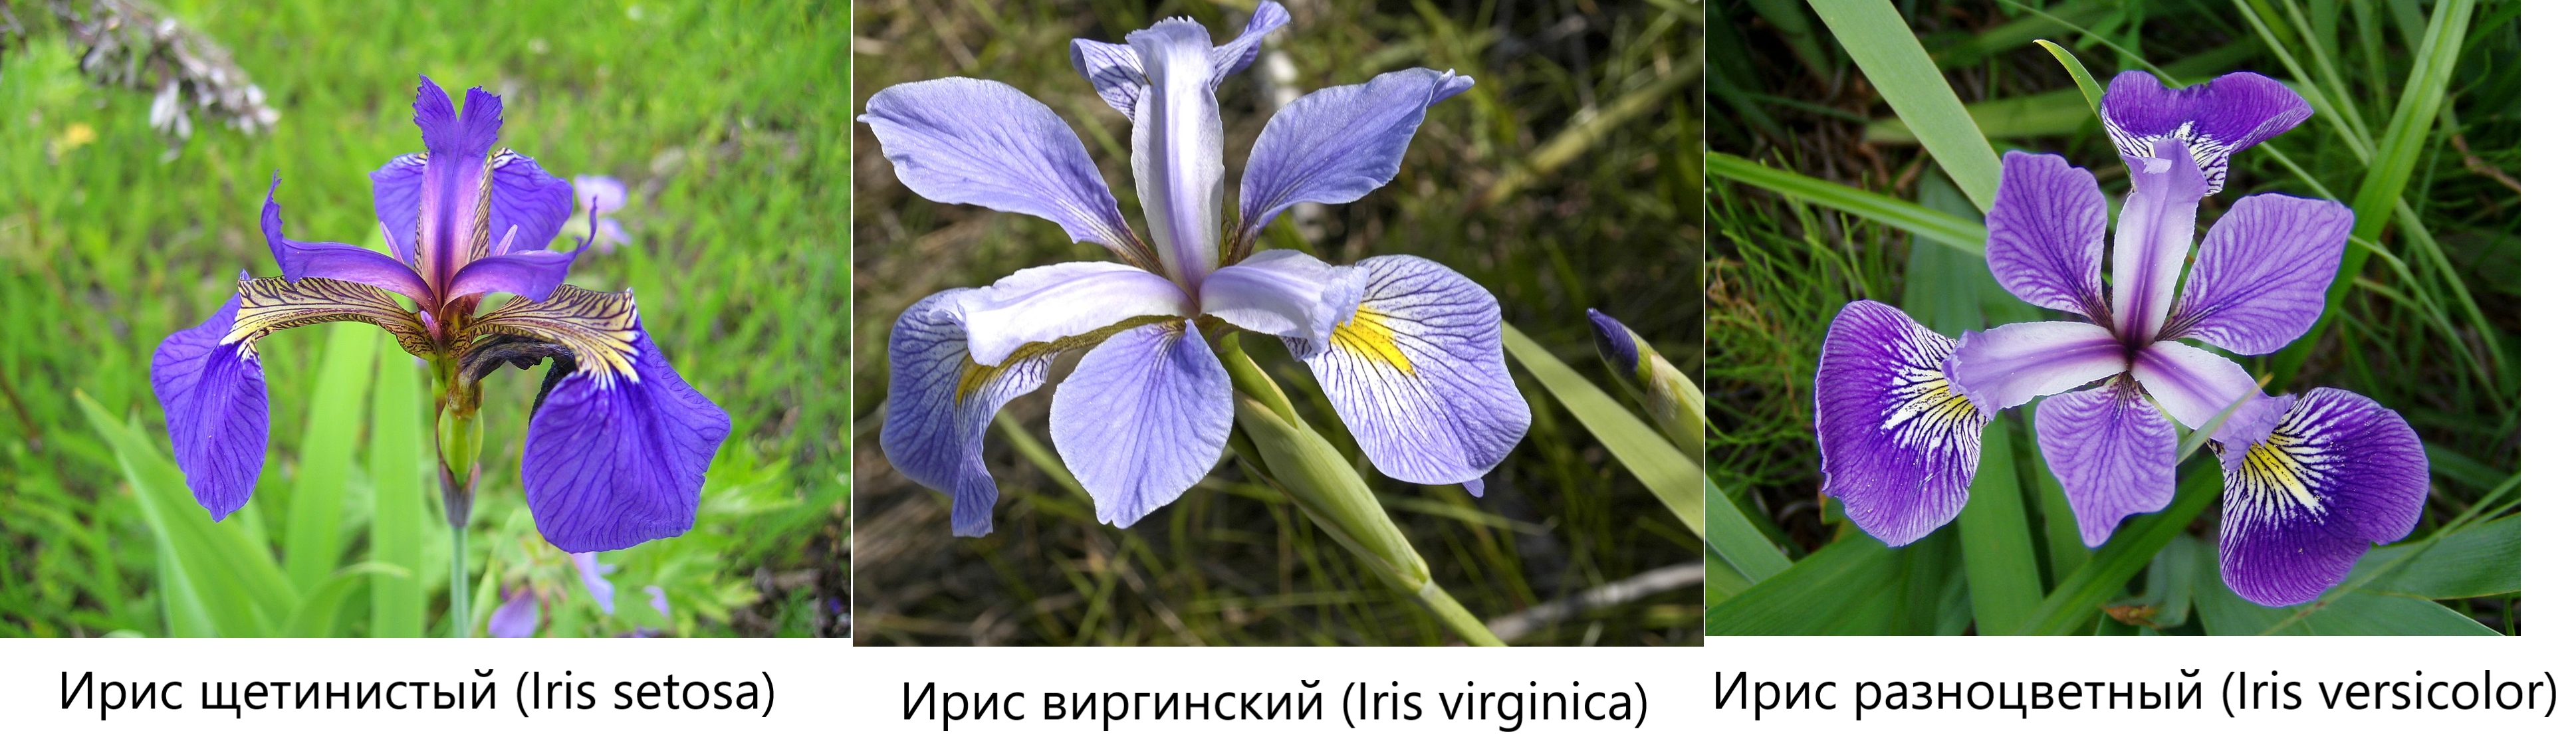

In [4]:
iris = pd.read_csv('iris.csv')
iris.head(n=5)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Типы данных в наборе


*   Категориальный: Species
*   Количественный (непрерывный): Sepal_length, Sepal_width, Petal_length, Petal_width


In [6]:
iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [7]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

## 1.2. Гистограммы + описательные статистики

<Axes: >

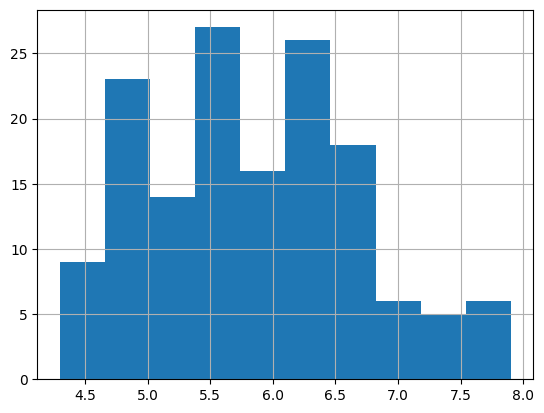

In [8]:
iris['sepal_length'].hist()

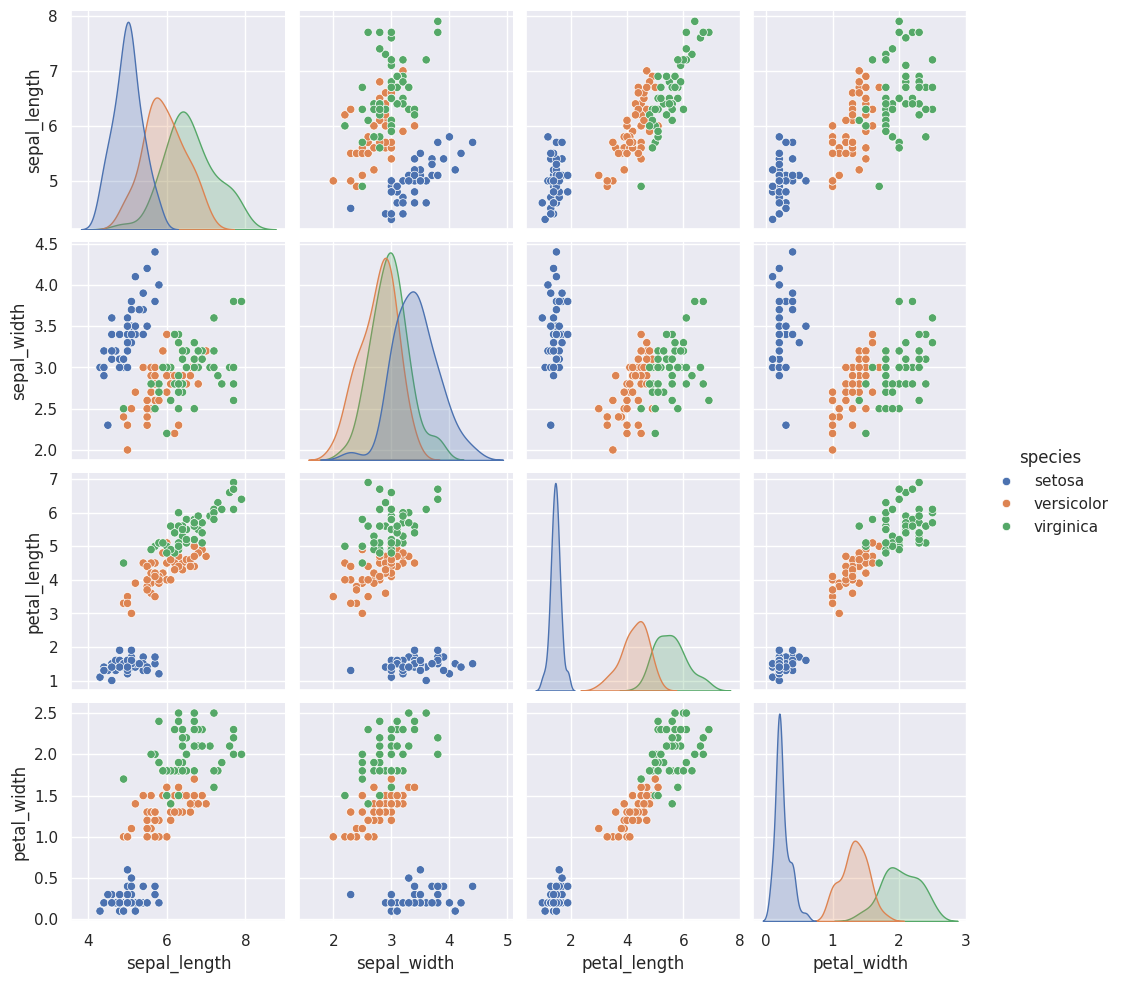

In [9]:
col = ['sepal_length','sepal_width', 'petal_length', 'petal_width']
sns.set()
sns.pairplot(iris, hue='species')

## 1.3. Проверка нормальности по критерию Шапиро-Уилка

> Работает с выборками до 5000 наблюдений (если выборка более 5000 - используем альтернативы: тест д'Агостино, критерий асимметрии и эксцесса, построение QQ-plot)

> Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности, уровень значимости полагаем равным 0,05



In [10]:
stats.shapiro(iris['sepal_length'])

ShapiroResult(statistic=np.float64(0.9760902723490532), pvalue=np.float64(0.010181161454691156))

In [11]:
Norm = pd.DataFrame(columns=['p-value','Norm'], index=col)
for c in col:
  Norm.at[c,'p-value']=stats.shapiro(iris[c])[1]
  if stats.shapiro(iris[c])[1]>0.05:
    Norm.at[c,'Norm']='Normal'
  else:
    Norm.at[c,'Norm']='Unknoun'
Norm

p-value     Norm
sepal_length  0.010181  Unknoun
sepal_width   0.075179   Normal
petal_length       0.0  Unknoun
petal_width        0.0  Unknoun

## 1.4. Анализ влияния категориальных признаков. Критерии сравнения групп

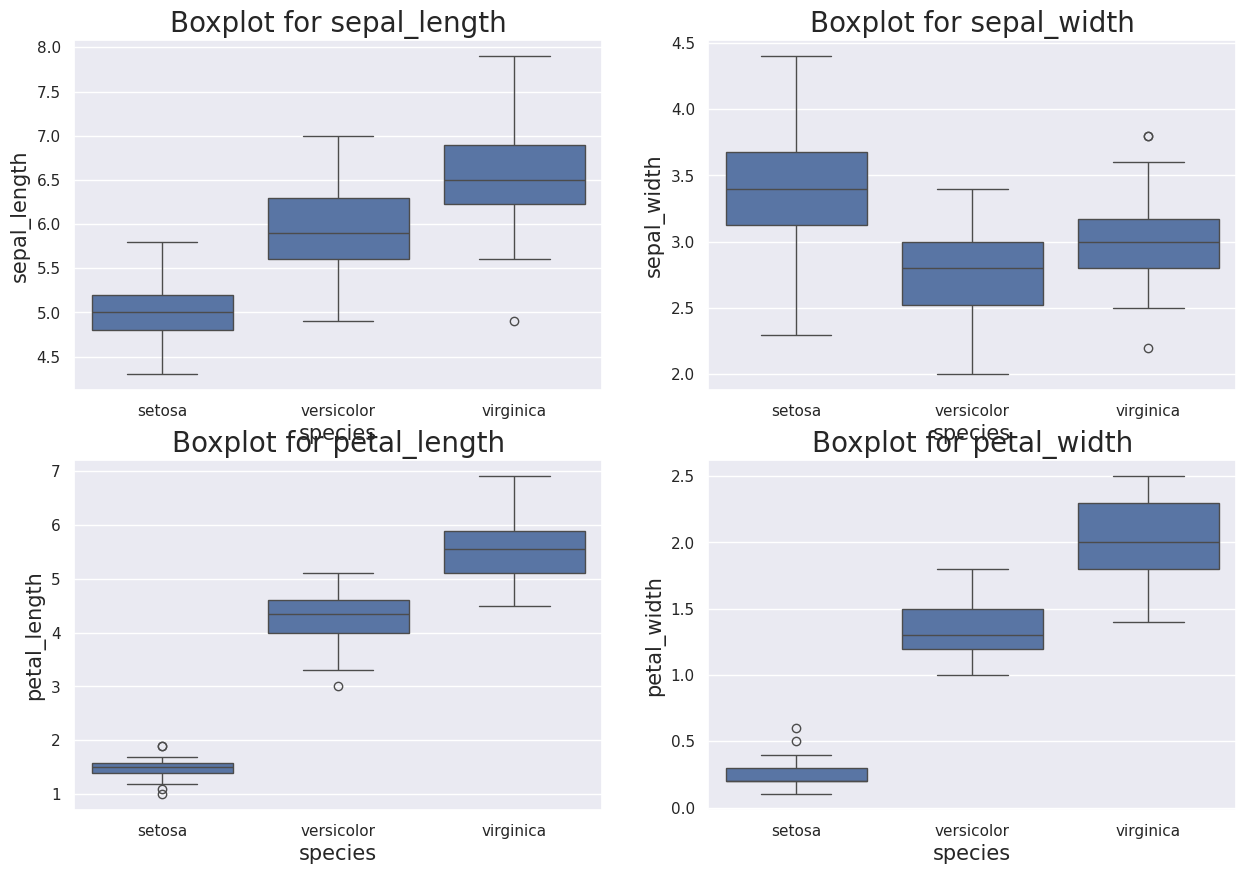

In [12]:
plt.figure(figsize=(15,10))

def show_boxplot(feature):
    sns.boxplot(data = iris, x = 'species', y = feature)
    plt.title('Boxplot for ' + feature, fontsize = 20)
    plt.xlabel('species', fontsize = 15)
    plt.ylabel(feature, fontsize = 15)

plt.subplot(221)
show_boxplot('sepal_length')

plt.subplot(222)
show_boxplot('sepal_width')

plt.subplot(223)
show_boxplot('petal_length')

plt.subplot(224)
show_boxplot('petal_width')

plt.show()

**Критерий Краскала-Уоллиса**

это непараметрический критерий, используется для сравнения трех или более независимых выборок.

Гипотеза Н0: медианные значения выборок не имеют статистически значимых отличий, уровень значимости полагаем равным 0,05

In [13]:
def kruskalwallis_iris(feature):
  iris1=np.array(iris[iris['species']=='setosa'][feature])
  iris2=np.array(iris[iris['species']=='versicolor'][feature])
  iris3=np.array(iris[iris['species']=='virginica'][feature])
  return stats.mstats.kruskalwallis(iris1,iris2,iris3)[1]

KruskalWallis = pd.DataFrame(columns=['p-value','KruskalWallis'], index=col)
for c in col:
  KruskalWallis.at[c,'p-value']=kruskalwallis_iris(c)
  if kruskalwallis_iris(c)>0.05:
    KruskalWallis.at[c,'KruskalWallis']='H0'
  else:
    KruskalWallis.at[c,'KruskalWallis']='H1'
KruskalWallis

p-value KruskalWallis
sepal_length     0.0            H1
sepal_width      0.0            H1
petal_length     0.0            H1
petal_width      0.0            H1

## 1.5. Анализ влияния количественных признаков

In [14]:
iris[col].corr(method='pearson') # количественная корреляция Пирсона

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000

<Axes: >

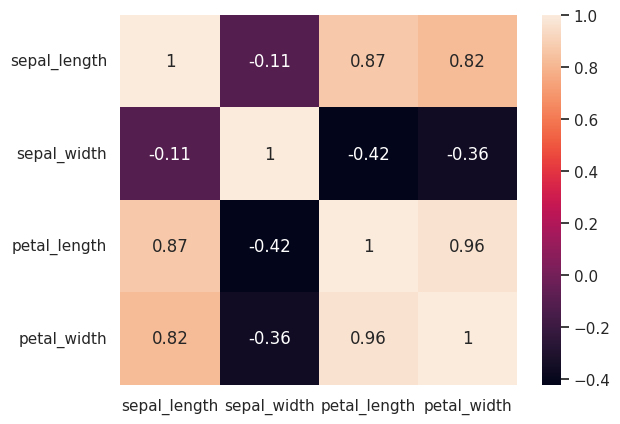

In [15]:
sns.heatmap(iris[col].corr(),annot=True)

Шкала Чеддока



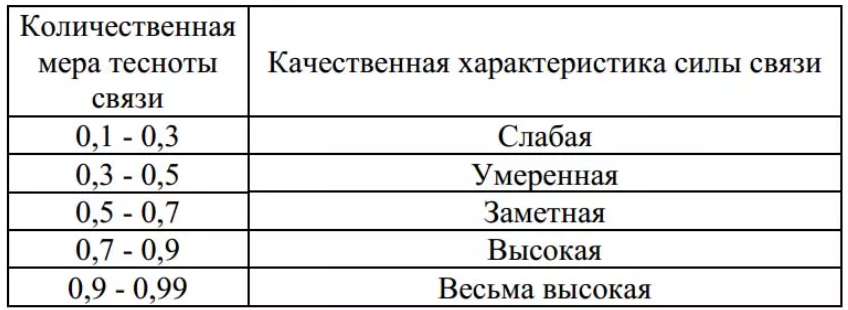

# 2.Логистическая регрессия

In [16]:
iris1=iris[(iris['species']=='versicolor')|(iris['species']=='virginica')]#отбираем 2 класса для бинарной классификации
c={'versicolor':0, 'virginica':1} #кодируем классы
iris1['species'] = iris1['species'].map(c)

/tmp/ipykernel_2417/2349961697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris1['species'] = iris1['species'].map(c)


<Axes: xlabel='petal_width', ylabel='species'>

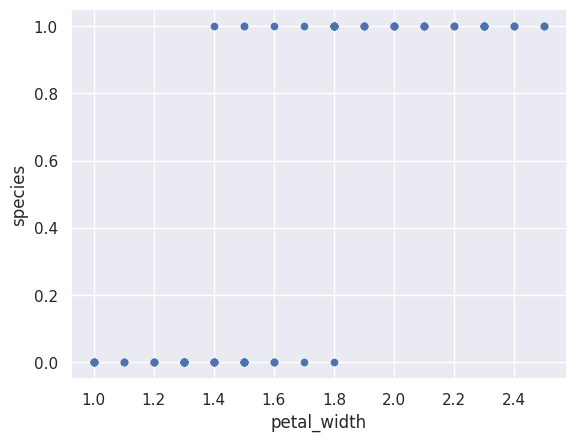

In [17]:
iris1.plot('petal_width','species',kind="scatter")

In [18]:
iris1.groupby('species')[['petal_width']].mean()

petal_width
species             
0              1.326
1              2.026

<Axes: xlabel='petal_width', ylabel='species'>

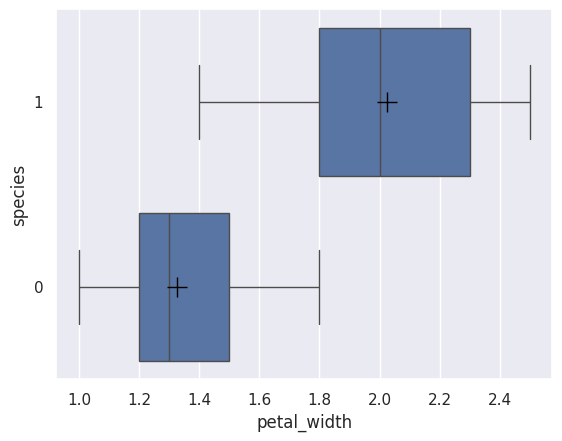

In [19]:
sns.boxplot(x='petal_width', y='species', data=iris1,
            showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "15"},
            orient='h',
            order=[1, 0])

In [20]:
iris1_0 = iris1[iris1['species']==0]
iris1_1 = iris1[iris1['species']==1]
scipy.stats.mannwhitneyu(iris1_0['petal_width'],iris1_1['petal_width'])

MannwhitneyuResult(statistic=np.float64(49.0), pvalue=np.float64(9.698045444914185e-17))

## 2.1. Разбиение на train и test

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X2=iris1[['petal_width']] #независимый фактор (объясняющий)
Y2=iris1['species'] #зависимый фактор (объясняемый)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=1) #разбиение наблюдений на train и test в соотношении 70:30

In [23]:
print('Data size: ',iris1.shape[0])
print('Train data size: ', X2_train.shape[0])
print('Test data size: ', X2_test.shape[0])

Data size:  100
Train data size:  70
Test data size:  30


In [24]:
X2_train

petal_width
117          2.2
149          1.8
104          2.2
145          2.3
138          1.8
..           ...
125          1.8
59           1.4
122          2.0
62           1.0
87           1.3

[70 rows x 1 columns]

In [25]:
X2_test

petal_width
130          1.9
134          1.4
83           1.6
131          2.0
143          2.3
67           1.0
86           1.5
132          2.2
119          1.5
115          2.3
142          1.9
89           1.3
106          1.7
102          2.1
101          1.9
82           1.2
81           1.0
94           1.3
128          2.1
60           1.0
52           1.5
123          1.8
147          2.0
112          2.1
69           1.1
85           1.6
144          2.5
77           1.7
96           1.3
88           1.3

## 2.2. Обучение модели

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
LogReg = LogisticRegression()
modelLR=LogReg.fit(X2_train,Y2_train) #обучение на train
modelLR.intercept_ #коэффициент а

array([-6.36178151])

In [28]:
modelLR.coef_ #коэффициент b

array([[3.78114411]])

Сигмоида
$$f(x)=\frac{1}{1+e^{-(a+bx)}}=\frac{e^{a+bx}}{1+e^{a+bx}}$$

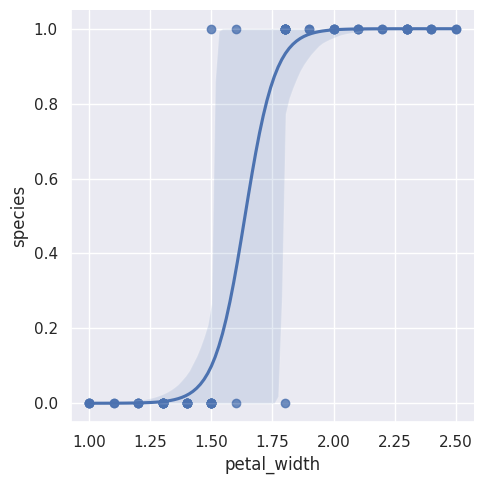

In [29]:
sns.lmplot(x='petal_width', y='species', data=iris1.loc[[x for x in X2_train.index]], logistic=True)

## 2.2. Проверка качества модели

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, roc_auc_score

### 2.2.1. Порог threshold = 0.5

In [32]:
Y2_train_pred=modelLR.predict(X2_train) #предсказание на train
Y2_test_pred=modelLR.predict(X2_test) #предсказание на test

In [33]:
pd.DataFrame(confusion_matrix(Y2_test, Y2_test_pred)) #матрица неточностей

0   1
0  13   1
1   2  14

Метрики качества

$$Accuracy=\frac{TP+TN}{TP+FP+TN+FN}$$

$$Recall =\frac{TP}{TP+FN} - полнота  (=TPR)$$

$$Precision =\frac{TP}{TP+FP} - точность$$

$$F1\ score=2\cdot\frac{Precision \cdot Recall}{Precision+Recall}$$

$$F1\ score=(\beta^2+1)\cdot\frac{Precision \cdot Recall}{\beta^2 Precision+Recall}$$

$$ 0<\beta<1 - приоритет \  точности, \beta>1 - приоритет \ полноты$$

In [34]:
print(classification_report(Y2_test, Y2_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.93      0.88      0.90        16

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [35]:
QualityMetrics=['Accuracy train','Accuracy test', 'F1 Score train','F1 Score test']
Classification2=pd.DataFrame(index=QualityMetrics)
Classification2.at[QualityMetrics,'Logistic Regression']=[accuracy_score(Y2_train,Y2_train_pred),
                                                accuracy_score(Y2_test,Y2_test_pred),
                                                f1_score(Y2_train,Y2_train_pred),
                                                f1_score(Y2_test,Y2_test_pred)]
Classification2

Logistic Regression
Accuracy train             0.957143
Accuracy test              0.900000
F1 Score train             0.955224
F1 Score test              0.903226

False Positive Rate
$$FPR=\frac{FP}{FP+TN}$$ - доля верно идентифицированных наблюдений нулевого класса
True Positive Rate
$$TPR=\frac{TP}{TP+FN}$$ - доля верно идентифицированных наблюдений единичного класса

In [36]:
fpr, tpr, threshold = roc_curve(Y2_train,Y2_train_pred)
roc_auc = auc(fpr, tpr)
roc_auc

np.float64(0.9566993464052287)

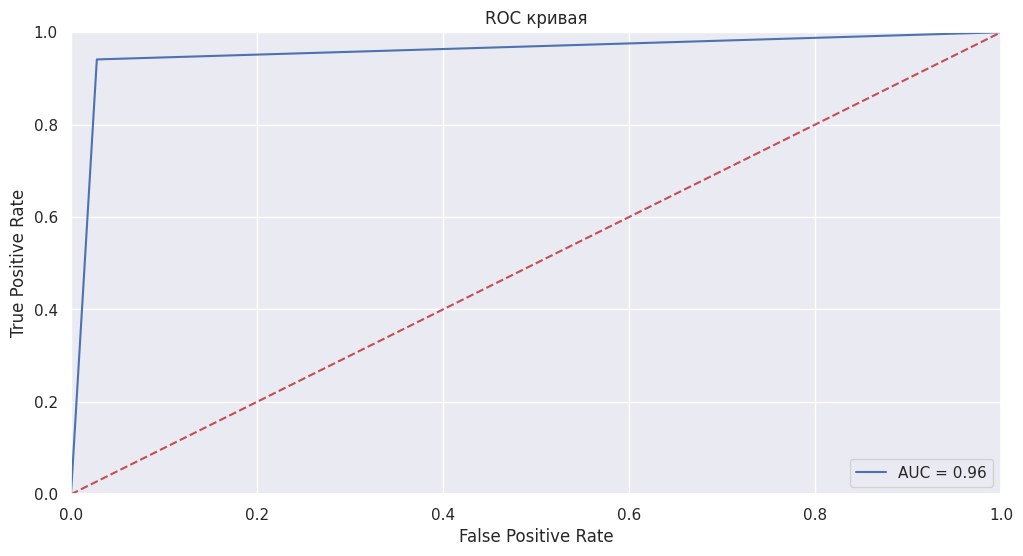

In [37]:
plt.figure(figsize=(12, 6))
plt.title('ROC кривая')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 2.2.2. Порог threshold = 0.4

In [38]:
threshold = 0.4
Y2_test_pred1 = np.where(modelLR.predict_proba(X2_test)[:,1] > threshold, 1, 0)
print('Accuracy for threshold 0.5 = %0.2f' % accuracy_score(Y2_test,Y2_test_pred))
print('Accuracy for threshold 0.4 = %0.2f' % accuracy_score(Y2_test,Y2_test_pred1))

Accuracy for threshold 0.5 = 0.90
Accuracy for threshold 0.4 = 0.83


In [39]:
threshold = []
for threshold1 in np.arange(0.05, 0.95, 0.05):
  Y2_test_pred = np.where(modelLR.predict_proba(X2_test)[:,1] > threshold1, 1, 0)
  threshold.append(accuracy_score(Y2_test,Y2_test_pred)) #средняя ошибка для предсказанных значений тестового набора

In [40]:
threshold

[0.5333333333333333,
 0.6666666666666666,
 0.7,
 0.8333333333333334,
 0.8333333333333334,
 0.8,
 0.8333333333333334,
 0.8333333333333334,
 0.9,
 0.9,
 0.9,
 0.9,
 0.8666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7,
 0.6,
 0.5666666666666667]

Text(0, 0.5, 'Accuracy')

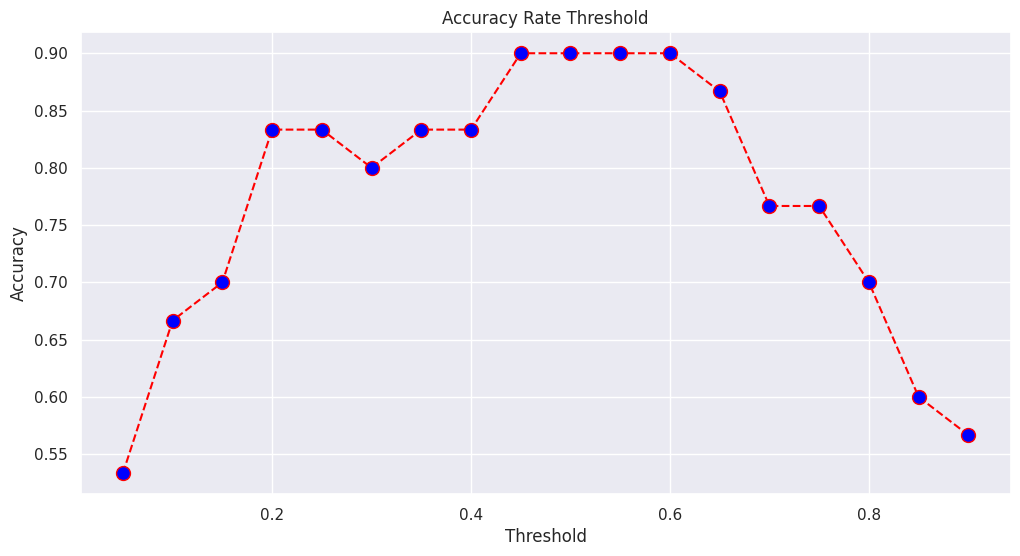

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(0.05, 0.95, 0.05), threshold, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate Threshold')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')

## 2.3. Прогноз

In [42]:
x_new_iris = [[1.85]] #значение фактора petal_width
y_new_iris=modelLR.predict(x_new_iris)
Classification2.at['Forecast','Logistic Regression']=y_new_iris.round(2)[0]
print('Прогноз категории ириса:',y_new_iris.round(2)[0])
Classification2

Прогноз категории ириса: 1


/home/kreishy/PycharmProjects/tgu/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Logistic Regression
Accuracy train             0.957143
Accuracy test              0.900000
F1 Score train             0.955224
F1 Score test              0.903226
Forecast                   1.000000

# 3.Наивный Байесовский классификатор

## 3.1. Множественная классификация

### 3.1.1. Разбиение на train и test

In [ ]:
X3=iris[['sepal_length','sepal_width','petal_length','petal_width']] #независимые факторы (объясняющие)
Y3=iris['species'] #зависимый фактор (объясняемый)
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.3, random_state=1) #разбиение наблюдений на train и test в соотношении 70:30

In [ ]:
print('Data size: ',iris.shape[0])
print('Train data size: ', X3_train.shape[0])
print('Test data size: ', X3_test.shape[0])

### 3.1.2. Обучение модели

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
modelGNB=gnb.fit(X3_train,Y3_train) #обучение на train

### 3.1.3. Проверка качества модели

In [ ]:
Y3_train_pred=modelGNB.predict(X3_train) #предсказание на train
Y3_test_pred=modelGNB.predict(X3_test) #предсказание на test

In [ ]:
pd.DataFrame(confusion_matrix(Y3_test, Y3_test_pred)) #матрица неточностей

In [ ]:
print(classification_report(Y3_test, Y3_test_pred))

In [ ]:
Classification3=pd.DataFrame(index=QualityMetrics)
Classification3.at[QualityMetrics,'Naive Bayes']=[accuracy_score(Y3_train,Y3_train_pred),
                                                accuracy_score(Y3_test,Y3_test_pred),
                                                f1_score(Y3_train,Y3_train_pred,average='weighted'),
                                                f1_score(Y3_test,Y3_test_pred,average='weighted')]
Classification3

### 3.1.3. Прогноз

In [ ]:
x_new_iris = [[4.25,4.3,1.2,0.8]] #
y_new_iris=modelGNB.predict(x_new_iris)
print('Прогноз категории ириса:',y_new_iris[0])
Classification3.at['Forecast','Naive Bayes']=y_new_iris[0]
Classification3

## 3.2. Бинарная классификация

In [ ]:
modelGNB2=gnb.fit(X2_train,Y2_train) #обучение на train
Y2_train_pred=modelGNB2.predict(X2_train) #предсказание на train
Y2_test_pred=modelGNB2.predict(X2_test) #предсказание на test

In [ ]:
pd.DataFrame(confusion_matrix(Y2_test, Y2_test_pred)) #матрица неточностей

In [ ]:
print(classification_report(Y2_test, Y2_test_pred))

In [ ]:
fpr, tpr, threshold = roc_curve(Y2_train,Y2_train_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
x_new_iris = [[1.85]] #значение фактора petal_width
y_new_iris=modelGNB2.predict(x_new_iris)
print('Прогноз категории ириса:',y_new_iris.round(2)[0])

In [ ]:
Classification2.at[QualityMetrics,'Naive Bayes']=[accuracy_score(Y2_train,Y2_train_pred),
                                                accuracy_score(Y2_test,Y2_test_pred),
                                                f1_score(Y2_train,Y2_train_pred),
                                                f1_score(Y2_test,Y2_test_pred)]
Classification2.at['Forecast','Naive Bayes']=y_new_iris.round(2)[0]
Classification2

# 4.Метод опорных векторов (Support Vector Machine)

## 4.1. Бинарная классификация

### 4.1.1. Разбиение на train и test

In [ ]:
X2=iris1[['petal_width','sepal_length']] #независимый фактор (объясняющий)
Y2=iris1['species'] #зависимый фактор (объясняемый)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=1) #разбиение наблюдений на train и test в соотношении 70:30

### 4.1.2. Обучение модели

In [ ]:
from sklearn.svm import SVC

**Модель с полиномиальным ядром (степень полинома 2 - парабола)**

In [ ]:
svc_classifier = SVC(kernel='poly', degree=2)
modelSVC2_poly=svc_classifier.fit(X2_train,Y2_train) #обучение на train

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
# Создание сетки для оценки модели
xx = np.linspace(-1, max(X2_train['petal_width']) + 1, len(X2_train))
yy = np.linspace(0, max(X2_train['sepal_length']) + 1, len(Y2_train))
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
train_size = len(X2_train['petal_width'])
# Присвоение классам различных цветов
colors = Y2_train
colors = np.where(colors == 1, 'blue', 'red')
# Построение графика набора данных
ax.scatter(X2_train['petal_width'], X2_train['sepal_length'], c=colors)
# Получение разделяющей гиперплоскости
Z = modelSVC2_poly.decision_function(xy).reshape(XX.shape)
# Рисунок границ решения и запасов
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# Выделение опорных векторов окружностями
ax.scatter(modelSVC2_poly.support_vectors_[:, 0], modelSVC2_poly.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()

**Модель с линейным ядром**

In [ ]:
svc_classifier = SVC(kernel='linear')
modelSVC2_linear=svc_classifier.fit(X2_train,Y2_train) #обучение на train

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
# Создание сетки для оценки модели
xx = np.linspace(-1, max(X2_train['petal_width']) + 1, len(X2_train))
yy = np.linspace(0, max(X2_train['sepal_length']) + 1, len(Y2_train))
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
train_size = len(X2_train['petal_width'])
# Присвоение классам различных цветов
colors = Y2_train
colors = np.where(colors == 1, 'blue', 'red')
# Построение графика набора данных
ax.scatter(X2_train['petal_width'], X2_train['sepal_length'], c=colors)
# Получение разделяющей гиперплоскости
Z = modelSVC2_linear.decision_function(xy).reshape(XX.shape)
# Рисунок границ решения и запасов
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# Выделение опорных векторов окружностями
ax.scatter(modelSVC2_linear.support_vectors_[:, 0], modelSVC2_linear.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()

### 4.1.3. Проверка качества модели

**Модель с полиномиальным ядром (степень полинома 2 - парабола)**

In [ ]:
Y2_train_pred_poly=modelSVC2_poly.predict(X2_train) #предсказание на train
Y2_test_pred_poly=modelSVC2_poly.predict(X2_test) #предсказание на test

In [ ]:
pd.DataFrame(confusion_matrix(Y2_test, Y2_test_pred_poly)) #матрица неточностей

In [ ]:
print(classification_report(Y2_test, Y2_test_pred_poly))

**Модель с линейным ядром**

In [ ]:
Y2_train_pred_linear=modelSVC2_linear.predict(X2_train) #предсказание на train
Y2_test_pred_linear=modelSVC2_linear.predict(X2_test) #предсказание на test

In [ ]:
pd.DataFrame(confusion_matrix(Y2_test, Y2_test_pred_linear)) #матрица неточностей

In [ ]:
print(classification_report(Y2_test, Y2_test_pred_linear))

In [ ]:
Classification2.at[QualityMetrics,'SVC']=[accuracy_score(Y2_train,Y2_train_pred_linear),
                                                accuracy_score(Y2_test,Y2_test_pred_linear),
                                                f1_score(Y2_train,Y2_train_pred_linear),
                                                f1_score(Y2_test,Y2_test_pred_linear)]
Classification2

### 4.1.4. Прогноз

In [ ]:
x_new_iris = [[0.8,4.25]] #
y_new_iris=modelSVC2_linear.predict(x_new_iris)
print('Прогноз категории ириса:',y_new_iris[0])
Classification2.at['Forecast','SVC']=y_new_iris[0]
Classification2

## 4.2. Множественная классификация

Используем разбиение данных, полученных в 3.1.1.

In [ ]:
svc_classifier = SVC(kernel='linear')
modelSVC3=svc_classifier.fit(X3_train,Y3_train) #обучение на train

In [ ]:
Y2_train_pred=modelSVC3.predict(X3_train) #предсказание на train
Y2_test_pred=modelSVC3.predict(X3_test) #предсказание на test

In [ ]:
pd.DataFrame(confusion_matrix(Y3_test, Y3_test_pred)) #матрица неточностей

In [ ]:
print(classification_report(Y3_test, Y3_test_pred))

In [ ]:
x_new_iris = [[4.25,4.3,1.2,0.8]] #
y_new_iris=modelSVC3.predict(x_new_iris)
print('Прогноз категории ириса:',y_new_iris[0])

In [ ]:
Classification3.at[QualityMetrics,'SVC']=[accuracy_score(Y3_train,Y3_train_pred),
                                                accuracy_score(Y3_test,Y3_test_pred),
                                                f1_score(Y3_train,Y3_train_pred,average='weighted'),
                                                f1_score(Y3_test,Y3_test_pred,average='weighted')]
Classification3 = Classification3.astype({"SVC": "object"})
Classification3.at['Forecast','SVC']=y_new_iris[0]
Classification3

# 5.Дерево решений (Decision Tree)

## 5.1. Множественная классификация

### 5.1.1. Разбиение на train и test

Используем разбиение данных, полученных в 3.1.1.

### 5.1.2. Обучение модели

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
dtr = DecisionTreeClassifier(max_depth=4)
modelDTC=dtr.fit(X3_train,Y3_train)

### 5.1.3. Проверка качества модели

In [ ]:
Y3_train_pred=modelDTC.predict(X3_train) #предсказание на train
Y3_test_pred=modelDTC.predict(X3_test) #предсказание на test

In [ ]:
pd.DataFrame(confusion_matrix(Y3_test, Y3_test_pred)) #матрица неточностей

In [ ]:
print(classification_report(Y3_test, Y3_test_pred))

In [ ]:
Classification3.at[QualityMetrics,'DTC']=[accuracy_score(Y3_train,Y3_train_pred),
                                                accuracy_score(Y3_test,Y3_test_pred),
                                                f1_score(Y3_train,Y3_train_pred,average='weighted'),
                                                f1_score(Y3_test,Y3_test_pred,average='weighted')]
Classification3

### 5.1.4. Прогноз

In [ ]:
x_new_iris = [[4.25,4.3,1.2,0.8]] #
y_new_iris=modelDTC.predict(x_new_iris)
print('Прогноз категории ириса:',y_new_iris[0])

In [ ]:
Classification3 = Classification3.astype({"DTC": "object"})
Classification3.at['Forecast','DTC']=y_new_iris[0]
Classification3

### 5.1.5. Визуализация

In [ ]:
plt.figure(figsize=(25,10))
tree.plot_tree(modelDTC,feature_names=X3_train.columns, fontsize=20,filled=True)
plt.show()

## 5.2. Бинарная классификация

Используем разбиение данных, полученных в 4.1.1.

In [ ]:
dtr = DecisionTreeClassifier(max_depth=4)
modelDTC=dtr.fit(X2_train,Y2_train)

In [ ]:
Y2_train_pred=modelDTC.predict(X2_train) #предсказание на train
Y2_test_pred=modelDTC.predict(X2_test) #предсказание на test

In [ ]:
pd.DataFrame(confusion_matrix(Y2_test, Y2_test_pred)) #матрица неточностей

In [ ]:
print(classification_report(Y2_test, Y2_test_pred))

In [ ]:
x_new_iris = [[0.8,4.25]] #
y_new_iris=modelDTC.predict(x_new_iris)
print('Прогноз категории ириса:',y_new_iris[0])

In [ ]:
Classification2.at[QualityMetrics,'DTC']=[accuracy_score(Y2_train,Y2_train_pred_linear),
                                                accuracy_score(Y2_test,Y2_test_pred_linear),
                                                f1_score(Y2_train,Y2_train_pred_linear),
                                                f1_score(Y2_test,Y2_test_pred_linear)]
Classification2.at['Forecast','DTC']=y_new_iris[0]
Classification2

# 6.Метод К-ближайших соседей

Стандартизация датасета

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(iris.drop('species', axis=1))
scaled_features = scaler.transform(iris.drop('species', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = iris.drop('species', axis=1).columns)
scaled_data

## 6.1. Разбиение на trian и test

Используем разбиение данных, полученных в 3.1.1.

## 6.2. Обучение модели

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
modelKNN = KNeighborsClassifier(n_neighbors = 2)
modelKNN.fit(X3_train, Y3_train)

## 6.2. Проверка качества модели

In [ ]:
Y4_train_pred=modelKNN.predict(X3_train) #предсказание на train
Y4_test_pred=modelKNN.predict(X3_test) #предсказание на test

In [ ]:
pd.DataFrame(confusion_matrix(Y3_test, Y3_test_pred)) #матрица неточностей

In [ ]:
print(classification_report(Y3_test, Y3_test_pred))

In [ ]:
error = []
for i in range(1, 40):
  modelKNN = KNeighborsClassifier(n_neighbors = i)
  modelKNN.fit(X3_train, Y3_train)
  Y4_test_pred = modelKNN.predict(X3_test)
  error.append(np.mean(Y4_test_pred != Y3_test)) #средняя ошибка для предсказанных значений тестового набора

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
Classification3.at[QualityMetrics,'KNN']=[accuracy_score(Y3_train,Y3_train_pred),
                                                accuracy_score(Y3_test,Y3_test_pred),
                                                f1_score(Y3_train,Y3_train_pred,average='weighted'),
                                                f1_score(Y3_test,Y3_test_pred,average='weighted')]
Classification3

## 6.4. Прогноз

In [ ]:
x_new_iris = [[4.25,4.3,1.2,0.8]]
y_new_iris=modelKNN.predict(x_new_iris)
print('Прогноз категории ириса:',y_new_iris[0])

In [ ]:
Classification3 = Classification3.astype({"KNN": "object"})
Classification3.at['Forecast','KNN']=y_new_iris[0]
Classification3

# 7.Подведение итогов

In [ ]:
Classification2

In [ ]:
Classification3